### Задание 1

Загрузите данные из набора Forest Fires (файл forestfires.csv) о лесных пожарах в Португалии. Задача состоит в том, чтобы с помощью линейной регрессии научиться предсказывать координату area (площадь пожара) в виде линейной комбинации других данных.

Чтобы работать с числовыми координатами, нечисловые координаты (month, day) нужно перевести в числовые. Для простоты можно заменить координату month на индикатор летнего сезона, а координату day не использовать вообще. По желанию можно сделать преобразование другим способом. Также добавьте координату, тождественно равную единице (вес при этой координате  интерпретируется как сдвиг).

Разбейте выборку на две части в соотношении 7:3 (перемешав её с помощью random.shuffle). По первой части постройте регрессионную модель. Примените модель ко второй части выборки и посчитайте по ней среднеквадратичную ошибку.

Для переменной area выполните преобразование $f(x) = ln(x+c)$ и постройте для нее новую регрессионную модель. Посчитайте среднеквадратичную ошибку для преобразованных значений. При каком $c$ предсказания получаются лучше всего? 

При выбранном $c$ сделайте разбиение выборки в соотношении 7:3 разными способами (перемешивая каждый раз). Найдите способ оценить разброс качества от разбиения. Сильно ли меняется качество? Сделайте выводы.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("forestfires.csv", sep=",")

In [3]:
print(data) # выведем данные для наглядности

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]


In [4]:
# преобразуем данные к формату, удобному для работы с ними
months = np.array([1 if month == 'jun' or month == 'jul' or month == 'aug' else 0 for month in data['month']])
X = np.array(data['X'])
Y = np.array(data['Y'])
FFMC = np.array(data['FFMC'])
DMC = np.array(data['DMC'])
DC = np.array(data['DC'])
ISI = np.array(data['ISI'])
temp = np.array(data['temp'])
RH = np.array(data['RH'])
wind = np.array(data['wind'])
rain = np.array(data['rain'])
area = np.array(data['area'])

In [5]:
N = X.size  # размер выборки

In [6]:
true = np.array([1] * N)

In [7]:
allDataT = np.array([true, X, Y, months, FFMC, DMC, DC, ISI, RH, wind, rain, area])
allData = allDataT.transpose()  # массив данных, преобразованных в числовой вид
np.random.shuffle(allData)      # перемешем выборку 
allDataT = allData.transpose()  # транспонированная матрица данных

In [8]:
n = int(0.7 * N)  # 70% выборки
m = N - n         # оставшиеся 30%

Посмотрим зависимость среднеквадратичной ошибки от разбиения выборки (для этого перед каждым разбиением будем перемешивать выборку).

In [9]:
# функция расчёта среднеквадратичной ошибки theta
# входные данные: выборка, которая делится на две части
# одна часть используется для нахождения параметра theta
# вторая - для измерения погрешности
def standard_deviation_calculating(partOfData, area):
    
    # данные для нахождения оценки
    trainingData = partOfData[0:n]
    trainingDataT = trainingData.transpose()
    trainingArea = area[0:n]
    
    # данные для измерения погрешности
    testData = partOfData[n:]
    testArea = area[n:]
    
    # считаем параметр theta и ошибку измерения
    theta = np.linalg.inv(trainingDataT.dot(trainingData)).dot(trainingDataT).dot(trainingArea)
    return (np.sum((testArea - testData.dot(theta)) ** 2) / m) ** 0.5

In [10]:
K = 50  # количество экспериментов
estimateError = np.array([0.0] * K)
for i in range(0, K):
    partOfData = allDataT[:-1].transpose()                               # часть наблюдения без параметра area
    area = allDataT[-1]                                                  # предсказываемая величина area
    estimateError[i] = standard_deviation_calculating(partOfData, area)  # получаем значение отклонения
    np.random.shuffle(allData)                                           # перемешем выборку (на будущее)
    allDataT = allData.transpose()

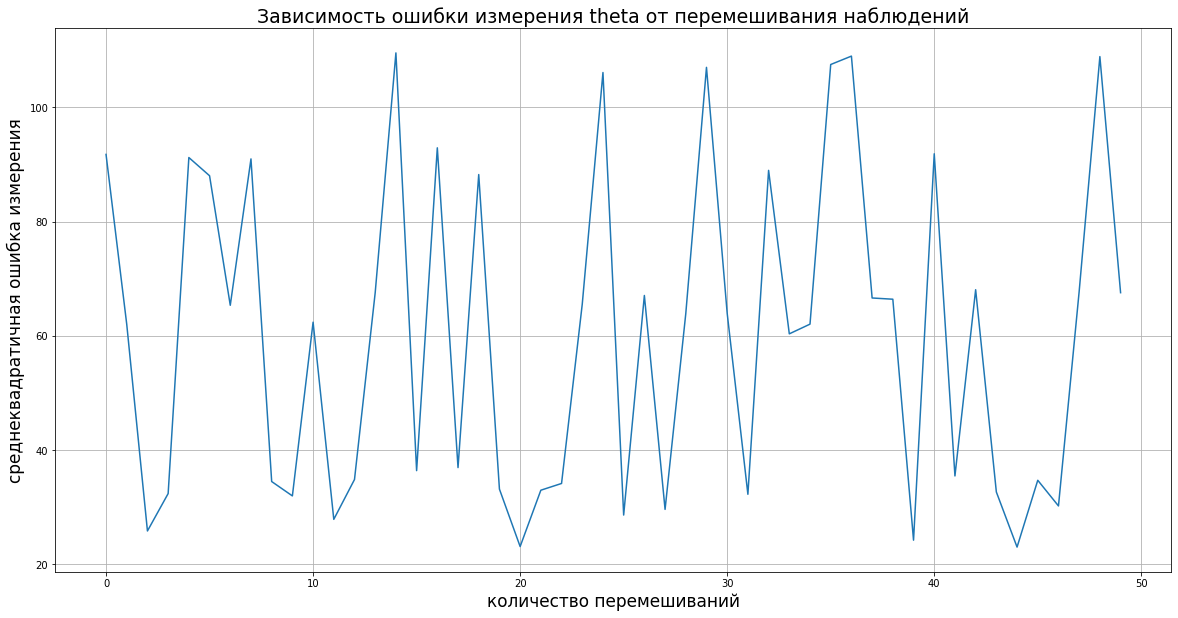

In [11]:
# построим график зависимости среднеквадратичного отклонения от перемешивания наблюдений
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(np.arange(0, K), estimateError)
plt.xlabel("количество перемешиваний", fontsize=17)
plt.ylabel("среднеквадратичная ошибка измерения", fontsize=17)
plt.title(u"Зависимость ошибки измерения theta от перемешивания наблюдений", fontsize=19)
plt.show()

Сделаем преобразование переменной area: $f(x) = ln(x+c)$. Посмотрим, для какого $c$ среднеквадратичная ошибка наименьшая.

In [12]:
C = np.arange(0, 10.1, 0.1)
Csize = C.size
estimateError = np.array([0.0] * Csize)

In [13]:
partOfData = allDataT[:-1].transpose()
area = allDataT[-1]
estimateError[0] = standard_deviation_calculating(partOfData, area)

In [14]:
for i in range(1, Csize):
    lnArea = np.log(area + C[i])
    estimateError[i] = standard_deviation_calculating(partOfData, lnArea)
estimateError[0] = np.log(estimateError[0])

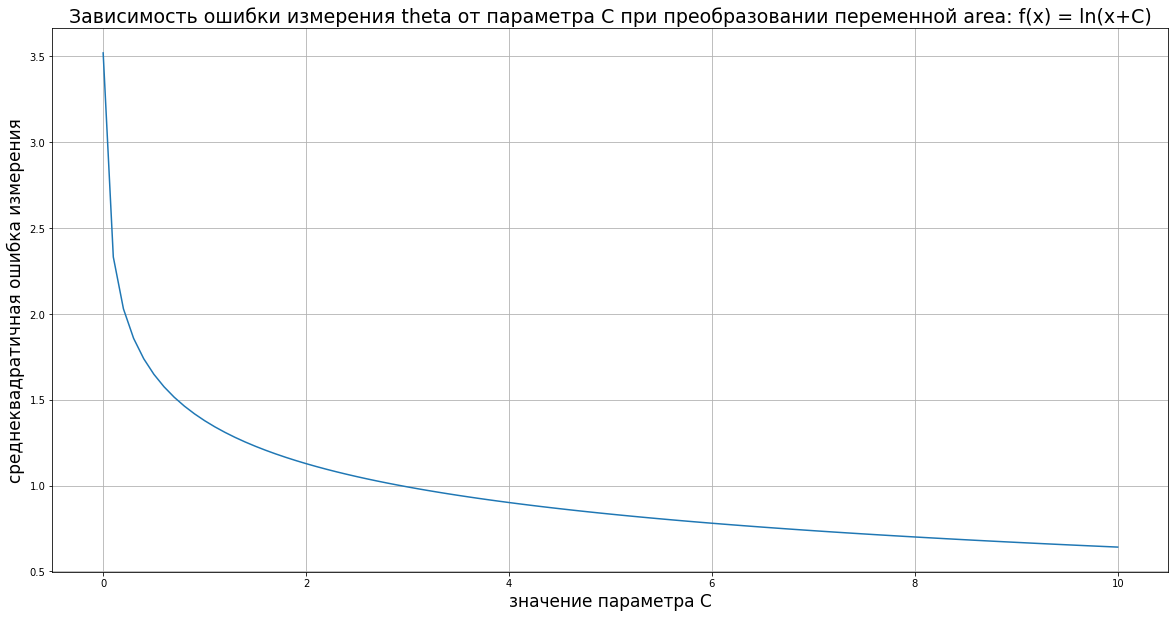

In [15]:
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(C, estimateError)
plt.xlabel("значение параметра С", fontsize=17)
plt.ylabel("среднеквадратичная ошибка измерения", fontsize=17)
plt.title(u"Зависимость ошибки измерения theta от параметра C при преобразовании переменной area: f(x) = ln(x+C)", fontsize=19)
plt.show()

$\textbf{Вывод:}$ как мы видим из первого графика среднеквадратичная ошибка измерения сильно зависит от выбранной части выборки. Возможно это связано с тем, что данная модель не подходит для предсказания результата, т.к. нет линейной взаимосвязи между area и остальными параметрами. Также при преоразовании переменной area среднеквадратичная ошибка уменьшается с увеличением $c$. Однако мы не можем до бесконечности увеличивать этот параметр, т.к. его влияние будет слишком сильным на результат (в нашем случае я взяла такие значения $c$, что они не превосходят $\overline{area}$)

### Задание 2

Пусть $X_i = \beta_1+i\beta_2+\varepsilon_0+\ldots+\varepsilon_i$ $(i= 0, 1, \ldots, n)$ $-$ расстояния, которые проехал трамвай за $i$ секунд по показанию датчика. Здесь $\beta_1 - $ начальное расстояние, $\beta_2 - $ скорость трамвая, $\varepsilon_0 - $ ошибка начального показания датчика. Трамвай едет с постоянной скоростью, и через каждую секунду датчик фиксирует расстояние, которое проехал трамвай. Отсчет времени идет от предыдущего замера, причём отсчет происходит с ошибкой. Для $i = 1, \ldots, n$ величина $\varepsilon_i$ есть ошибка приращения расстояния, то есть $\varepsilon_i = \varepsilon_i^t \beta_2,$ где $\varepsilon_i^t - $ ошибка отсчета времени. Все ошибки $\varepsilon_i$ независимы и распределены по закону $N(0, \sigma^2)$. 

Сведите задачу к линейной модели и найдите оценки наименьших квадратов для начального расстояния $\beta_1$ и скорости $\beta_2,$ а также несмещенную оценку для $\sigma^2,$ из которой выразите оценку дисперсии отсчета времени. Сделайте выводы.

In [16]:
distance = pd.read_csv("regression.csv", sep=",")
X = np.array(distance['distance'])
N = X.size

Сведём задачу к линейной модели:
$X = Z\theta + \epsilon$, где $\theta = (\beta_1, \beta_2)^T$. 

Тогда $Z = \begin{pmatrix}1 & 0 \\ 1 & 1 \\ \ldots & \ldots \\ 1 & n-1\end{pmatrix}$

In [17]:
# составим массив Z
ones = np.array([1] * N)
nums = np.arange(0, N)
zT = np.array([ones, nums])
z = zT.transpose()

$\widehat{\theta} = (Z^TZ)^{-1}Z^TX $ - оценка по методу наименьших квадратов

In [18]:
# найдём оценку для theta:
theta =  np.linalg.inv(zT.dot(z)).dot(zT).dot(X)

In [19]:
print(f"Начальное расстояние = {theta[0]}\nСкорость = {theta[1]}")

Начальное расстояние = 85.9521621366639
Скорость = 11.953517430957628


$E\epsilon_i = 0, $ $D\epsilon_i = \sigma^2$

$\widehat{\sigma}^2 = \frac{1}{n-2}||X-Z\widehat{\theta}||^2$ - несмещённая оценка $\sigma^2$. 
Тогда оценка дисперсии отсчёта времени есть $\widehat{\sigma}^2_t = \frac{\widehat{\sigma}^2}{\beta_2}$.

In [20]:
# ищем несмещённую оценку sigma^2:
s = np.sum((X - z.dot(theta)) ** 2) / (N - 2)
sigma_squared = s / theta[1]
sigma = sigma_squared ** 0.5

In [21]:
print(f"Дисперсия отсчёта времени = {sigma_squared}\nСреднеквадратичное отклонение = {sigma}")

Дисперсия отсчёта времени = 6.612508158537049
Среднеквадратичное отклонение = 2.571479760475872


In [23]:
res = theta[0] + nums * theta[1] # пройденные расстояния согласно линейной модели
diff = np.absolute(res - X) # абсолютная разность между действительными и подсчитанными значениями

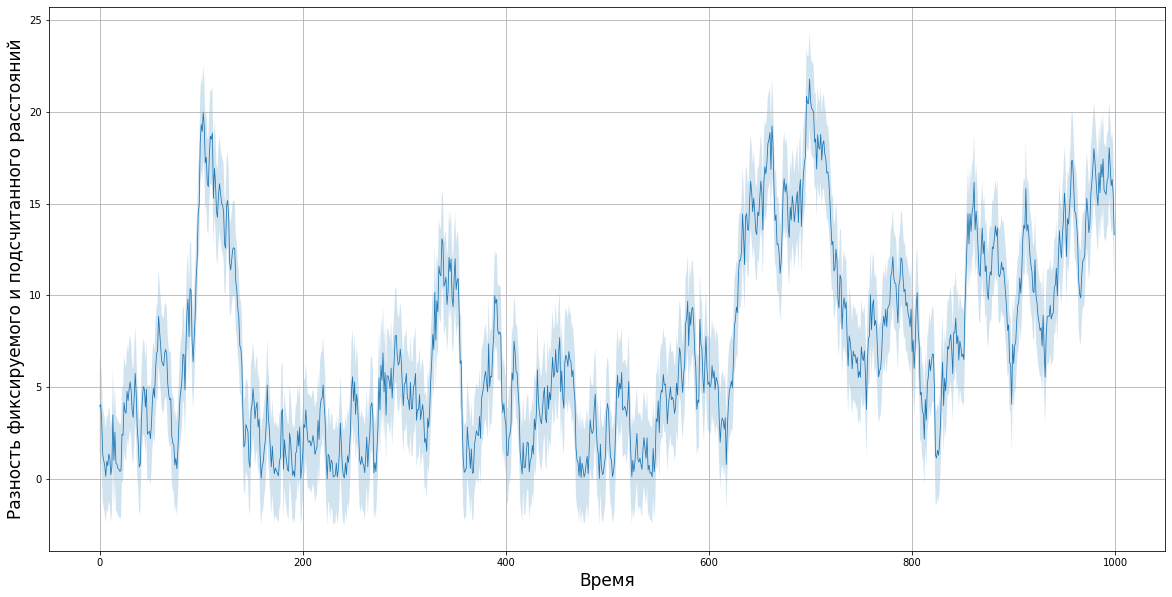

In [29]:
plt.figure(figsize=(20,10))
plt.grid()

plt.plot(nums, diff, linewidth=0.8)
plt.fill_between(nums, diff + sigma, diff - sigma, alpha=0.2)

plt.xlabel('Время', fontsize=17)
plt.ylabel('Разность фиксируемого и подсчитанного расстояний', fontsize=17)

plt.show()

$\textbf{Вывод:}$ для данной задачи линейная модель хорошо подходит для находения неизвестных параметров. Подсчитанное расстояние с высокой точностью соответствует зафиксированным значениям.